In [2]:
import math # importe un package
import numpy as np # importe un package sous un nom particulier from sklearn import linear_model # importe tout un module
from os import mkdir
from numpy.linalg import inv
from numpy.linalg import norm
import random
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statistics
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# The 1 dimensional case

### 1) Implement Gradient Descent Function

You'll need to create a Python function for gradient descent. The function should take the feature matrix X, target vector y, learning rate, and the number of iterations as inputs. Make sure to include a column of ones in the feature matrix X to account for the intercept. Here's a Python function to get you started:

In [3]:
import numpy as np

def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize the coefficients (slope and intercept)
    theta = np.zeros(X.shape[1])
    m = len(y)
    
    # Lists to store the history of MSE and gradient norms
    mse_history = []
    gradient_norms = []
    
    for i in range(num_iterations):
        # Calculate the predicted values
        y_pred = np.dot(X, theta)
        
        # Calculate the gradient of the Mean Squared Error (MSE)
        gradient = (-2/m) * np.dot(X.T, (y - y_pred))
        
        # Update the coefficients using gradient descent
        theta -= learning_rate * gradient
        
        # Calculate the MSE and gradient norm at each iteration
        mse = np.mean((y - y_pred)**2)
        mse_history.append(mse)
        gradient_norm = np.linalg.norm(gradient)
        gradient_norms.append(gradient_norm)
    
    return theta, mse_history, gradient_norms


### 2) Create a Random Sample Dataset

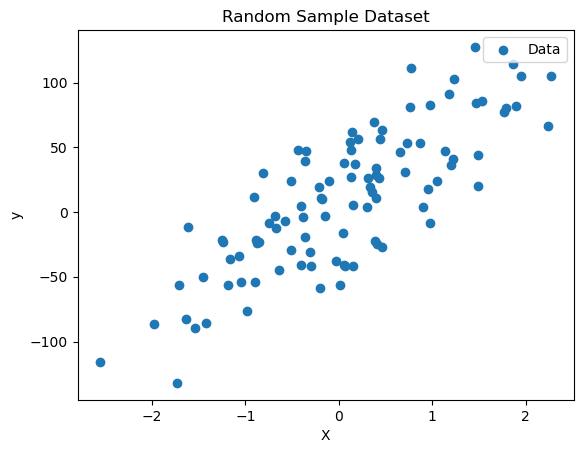

Slope (Coefficient): 42.38550485581797


In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Create the random dataset
X, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=10, random_state=0, coef=True)

# Plot the dataset
plt.scatter(X, y, label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Sample Dataset")
plt.legend()
plt.show()

print("Slope (Coefficient):", coef)


### 3) Apply Gradient Descent

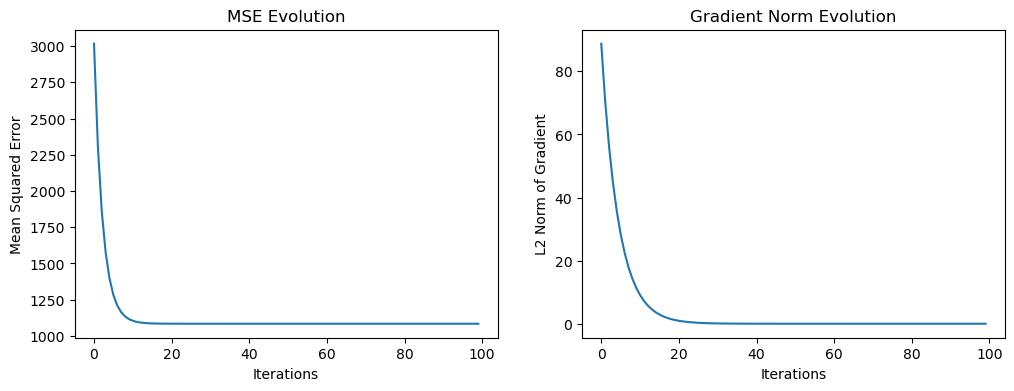

In [5]:
theta, mse_history, gradient_norms = gradient_descent(X, y, learning_rate=0.1, num_iterations=100)

# Plot MSE evolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("MSE Evolution")

# Plot gradient norms evolution
plt.subplot(1, 2, 2)
plt.plot(range(len(gradient_norms)), gradient_norms)
plt.xlabel("Iterations")
plt.ylabel("L2 Norm of Gradient")
plt.title("Gradient Norm Evolution")

plt.show()


### 4) Compare Different Estimation Methods

In [6]:
# Calculate the solution using the normal equation
theta_normal_eq = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Calculate the solution using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
theta_sklearn = [model.coef_[0], model.intercept_]


In [7]:
# Real coefficients (slope and intercept) used for dataset generation
print("Real Coefficients (Slope, Intercept):", coef)

# Coefficients obtained using the normal equation
print("Coefficients (Slope, Intercept) - Normal Equation:", theta_normal_eq)

# Coefficients obtained using sklearn's Linear Regression
print("Coefficients (Slope, Intercept) - sklearn Linear Regression:", theta_sklearn)

# Coefficients obtained using Gradient Descent
print("Coefficients (Slope, Intercept) - Gradient Descent:", theta)

# Compare the coefficients with the real values
print("\nComparison with Real Coefficients:")
print("Normal Equation - Error (Slope, Intercept):", np.abs(theta_normal_eq - coef))
print("sklearn Linear Regression - Error (Slope, Intercept):", np.abs(theta_sklearn - coef))
print("Gradient Descent - Error (Slope, Intercept):", np.abs(theta - coef))


Real Coefficients (Slope, Intercept): 42.38550485581797
Coefficients (Slope, Intercept) - Normal Equation: [43.53067409]
Coefficients (Slope, Intercept) - sklearn Linear Regression: [43.08728116246489, 7.557454518907823]
Coefficients (Slope, Intercept) - Gradient Descent: [43.53067409]

Comparison with Real Coefficients:
Normal Equation - Error (Slope, Intercept): [1.14516924]
sklearn Linear Regression - Error (Slope, Intercept): [ 0.70177631 34.82805034]
Gradient Descent - Error (Slope, Intercept): [1.14516923]


# Exploring the diabetes Dataset

### 1) Data Loading and Separation

In [8]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

### 2) Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


### 3) Standardization of Features and Observations

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 4) Performance Metrics and Visualization

Text(0.5, 1.0, 'MSE Evolution')

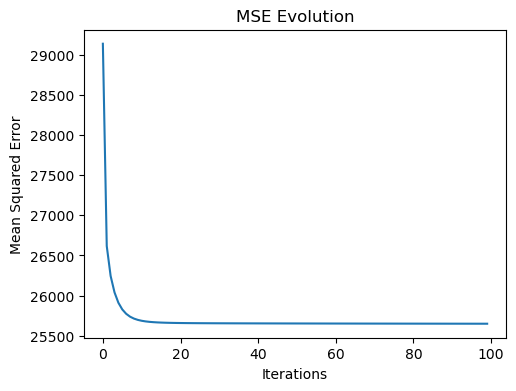

In [11]:
theta, mse_history, gradient_norms = gradient_descent(X_train, y_train, learning_rate=0.1, num_iterations=100)

# Plot MSE evolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("MSE Evolution")

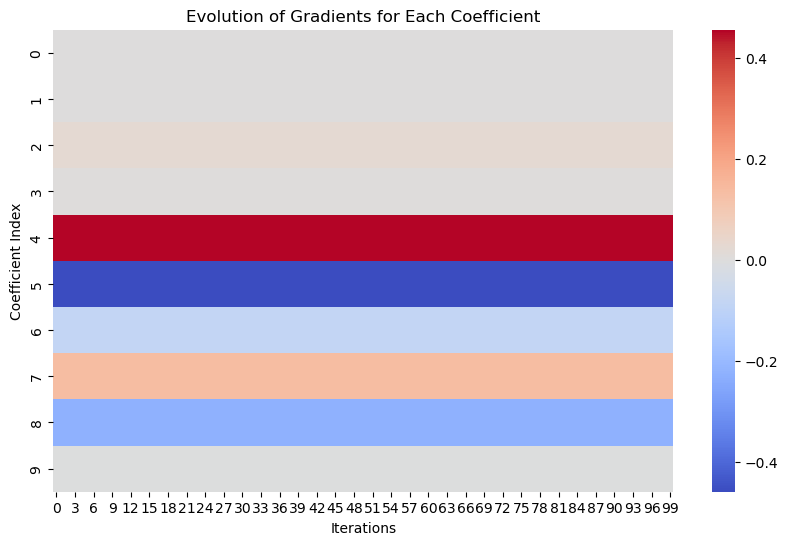

In [13]:
# Initialize a matrix to store gradients for each coefficient at each iteration
gradient_history = np.zeros((X_train.shape[1], len(gradient_norms)))

for i in range(len(gradient_norms)):
    # Calculate the gradient for the current iteration
    gradient = (-2/len(y_train)) * np.dot(X_train.T, (y_train - np.dot(X_train, theta)))
    
    # Store the gradient for each coefficient
    gradient_history[:, i] = gradient

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gradient_history, cmap='coolwarm', cbar=True)
plt.xlabel("Iterations")
plt.ylabel("Coefficient Index")
plt.title("Evolution of Gradients for Each Coefficient")
plt.show()